# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

This notebook explores Dandiset 000563 version 0.250311.2145, which contains electrophysiology and optogenetics data from the Allen Institute OpenScope experiment.

**Disclaimer:** This notebook was generated by an AI and has not been fully verified. Please be cautious when interpreting the code or results.

## Dandiset Overview

This Dandiset contains data from an experiment investigating the temporal precision of neural responses to white noise visual stimuli in the mouse brain, with a focus on cortical and subcortical visual areas. The experiment used the OpenScope Neuropixels passive viewing protocol and displayed visual stimuli modulated by a short, repeated white noise sequence. The dataset allows for the investigation of "temporal barcodes" as potential identifiers of discrete cell types.

You can find the Dandiset here: https://dandiarchive.org/dandiset/000563/0.250311.2145

## Required Packages

To run this notebook, you will need the following Python packages installed:

* `dandi`
* `pynwb`
* `h5py`
* `remfile`
* `numpy`
* `matplotlib`
* `pandas`
* `seaborn`

## Loading the Dandiset

We can use the `dandi` Python library to interact with the DANDI archive and access the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


## Loading an NWB File

The data in this Dandiset is stored in NWB (Neurodata Without Borders) format. We will load one of the electrophysiology NWB files to explore its contents.

We will load the file located at `sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# Define the URL for the NWB file
nwb_file_url = "https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/"

# Load the NWB file
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB file loaded successfully.")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


## NWB File Contents Summary

This NWB file contains electrophysiology data from a single probe. Key data streams and tables include:

* **LFP Data:** Local field potential (LFP) recordings from 73 channels. Located at `acquisition/probe_0_lfp_data`.
* **Electrodes Table:** Metadata about each recording channel, including location and position on the probe. Located at `electrodes`.
* **Subject Information:** Details about the experimental subject (mouse), including age, genotype, and sex. Located at `subject`.

Here is a simplified view of some relevant parts of the NWB file structure:

```
/
├── acquisition/
│   └── probe_0_lfp/
│       └── electrical_series/
│           └── probe_0_lfp_data (ElectricalSeries)
├── electrodes (DynamicTable)
├── subject (EcephysSpecimen)
└── ... (other NWB objects)
```

**Explore this NWB file on Neurosift:**

You can explore this NWB file interactively using NeuroSift:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&amp;dandisetId=000563&amp;dandisetVersion=draft

## Visualizing Electrode Positions

Let's visualize the positions of the electrodes on the recording probe.

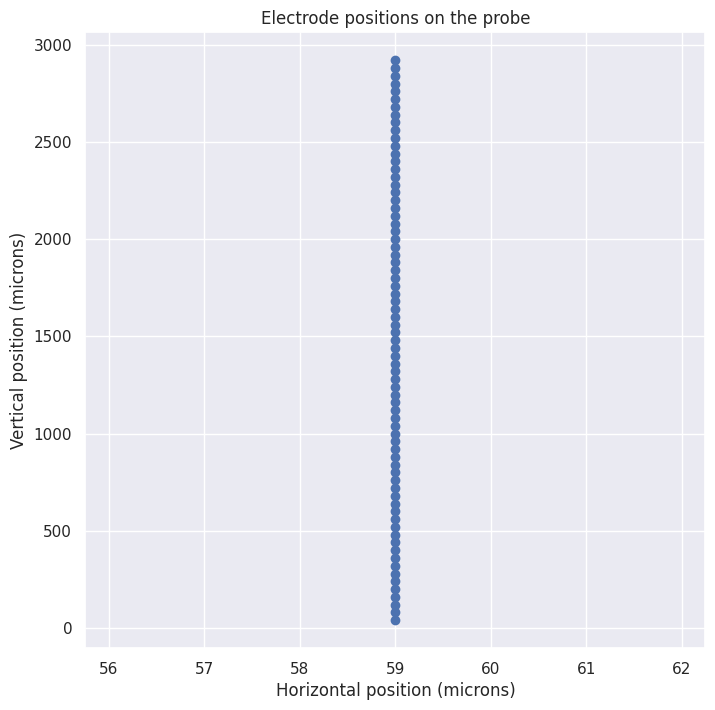

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for better plotting
sns.set_theme()

# Get the electrodes table and convert to a DataFrame
electrodes_table = nwb.electrodes.to_dataframe()

# Plot electrode positions (vertical vs horizontal position)
plt.figure(figsize=(8, 8))
plt.scatter(electrodes_table['probe_horizontal_position'], electrodes_table['probe_vertical_position'])
plt.xlabel("Horizontal position (microns)")
plt.ylabel("Vertical position (microns)")
plt.title("Electrode positions on the probe")
plt.grid(True)
plt.show()

The plot shows that the electrodes are arranged in a linear configuration along the vertical axis, with a small spread in the horizontal dimension. This corresponds to the layout of a Neuropixels probe.

## Visualizing LFP Data

Now let's visualize a small segment of the LFP data from one of the electrodes. Due to the large size of the dataset, we will only load and plot a short duration of data.

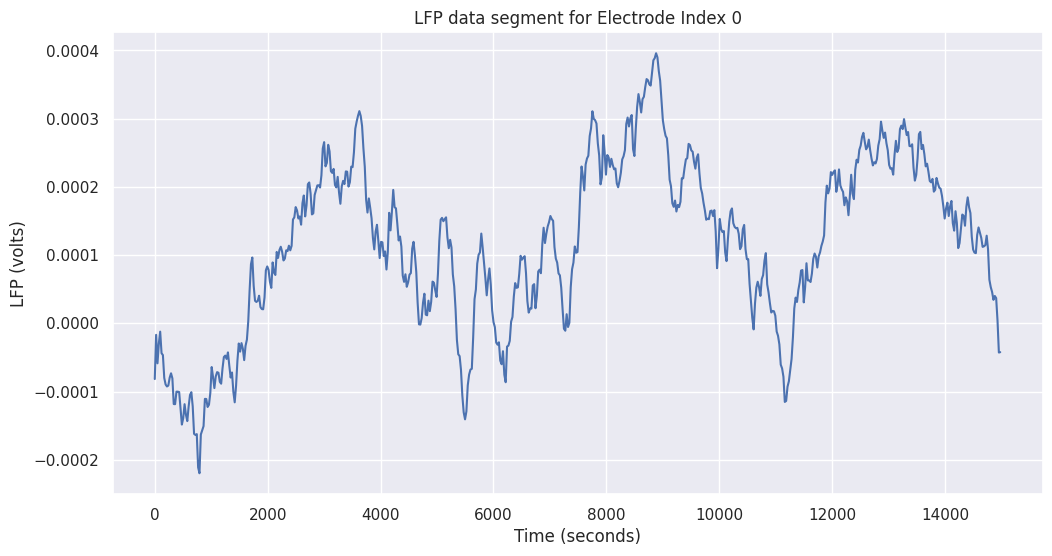

In [4]:
import numpy as np

# Get LFP data and timestamps
lfp_data = nwb.acquisition["probe_0_lfp_data"].data
timestamps = nwb.acquisition["probe_0_lfp_data"].timestamps

# Get the sampling rate from the associated electrode group
# Assuming 'poseA' is the correct electrode group name for 'probe_0'
electrode_group = nwb.electrode_groups["probeA"]
sampling_rate = electrode_group.lfp_sampling_rate

# Select a small segment of LFP data (e.g., the first 1 second) for the first electrode
segment_duration = 1 # seconds
num_samples = int(segment_duration * sampling_rate)
electrode_index_to_plot = 0

lfp_segment = lfp_data[0:num_samples, electrode_index_to_plot]
timestamp_segment = timestamps[0:num_samples]

# Plot the LFP data segment
plt.figure(figsize=(12, 6))
plt.plot(timestamp_segment, lfp_segment)
plt.xlabel("Time (seconds)")
plt.ylabel("LFP (volts)")
plt.title(f"LFP data segment for Electrode Index {electrode_index_to_plot}")
plt.grid(True)
plt.show()

This plot shows the fluctuations in the local field potential over a 1-second interval for a single electrode. LFP reflects the summated activity of a large population of neurons near the electrode.

## Visualizing LFP Data Across Multiple Electrodes

To get a sense of the spatial extent of the recorded LFP activity, let's visualize a segment of data across several electrodes. We will offset the traces vertically for better visibility.

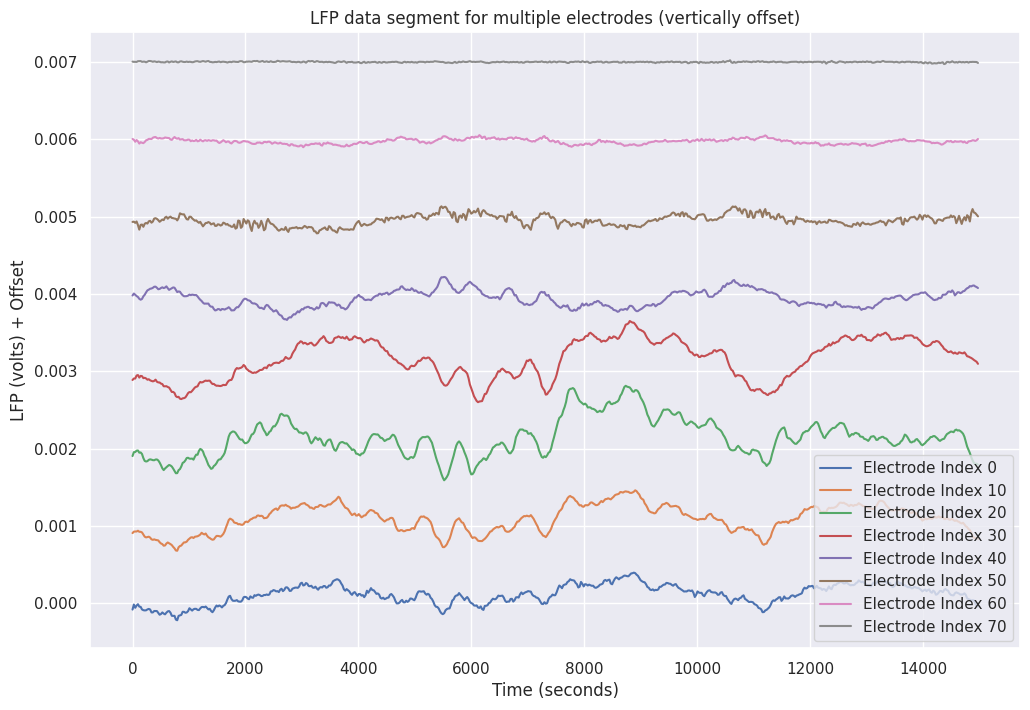

In [5]:
# Select a small segment of LFP data (e.g., the first 1 second) for multiple electrodes
segment_duration = 1 # seconds
num_samples = int(segment_duration * sampling_rate)
electrode_indices_to_plot = [0, 10, 20, 30, 40, 50, 60, 70] # Select indices

lfp_segment_multi = lfp_data[0:num_samples, electrode_indices_to_plot]
timestamp_segment_multi = timestamps[0:num_samples]

# Plot the LFP data segments with vertical offsets
plt.figure(figsize=(12, 8))
offset = 0.001 # Adjust offset as needed
for i, elec_idx in enumerate(electrode_indices_to_plot):
    plt.plot(timestamp_segment_multi, lfp_segment_multi[:, i] + i * offset, label=f'Electrode Index {elec_idx}')

plt.xlabel("Time (seconds)")
plt.ylabel("LFP (volts) + Offset")
plt.title("LFP data segment for multiple electrodes (vertically offset)")
plt.legend()
plt.grid(True)
plt.show()

This plot allows us to compare the LFP activity across different depths (or positions) on the probe. You can observe similarities and differences in the waveforms, which can provide insights into the spatial spread and coherence of neural activity.

## Summary and Future Directions

This notebook has provided a basic introduction to accessing and visualizing electrophysiology data from Dandiset 000563. We have demonstrated how to load the Dandiset information, access an NWB asset, inspect its contents, and visualize both electrode positions and LFP time series data.

Possible future directions for analysis include:

* Exploring other data modalities in the Dandiset, such as optogenetics data or spike data if available.
* Performing more advanced LFP analysis, such as spectral analysis or examining correlations between channels.
* Investigating the relationship between the recorded neural activity and the visual stimuli presented during the experiment.
* Utilizing the spike data (if available) for spike sorting or analyzing single-unit activity.
* Relating the neural activity to the subject's metadata and experimental conditions.

In [6]:
# Close the NWB file after analysis
io.close()